In [17]:
print('hello World')

hello World


In [3]:
%cd C:\Users\miwong\OneDrive - Suncor Energy Inc\ML Attempt

C:\Users\miwong\OneDrive - Suncor Energy Inc\ML Attempt


In [18]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [60]:
churn_df = pd.read_csv("Engine Samples and Hours v2.csv")
churn_df.head()


,Real Number,rownumber,Fail,Days before next Failure,Reason for Changeout,FunctionalLoc,Descriptions,Measurement,UpLim,Measuring,...,ISO_5_Flag,ISO_15_Flag,ISO_50_Flag,ISO_100_Flag,ISO_150_Flag,ISO_25_Flag,Percent_Allowable_Soot_Flag,Sample_Rank,Be,Be_Flag
0,1,104.0,0,0,NaN,5312-POWRTRN-ENGSYS-ENGINE,ENGINE,25032.32,18000.0,21351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN
1,2,103.0,0,0,NaN,5312-POWRTRN-ENGSYS-ENGINE,ENGINE,24180.70,18000.0,21351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN
2,3,102.0,0,0,NaN,5312-POWRTRN-ENGSYS-ENGINE,ENGINE,23592.93,18000.0,21351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN
3,4,101.0,0,0,NaN,5312-POWRTRN-ENGSYS-ENGINE,ENGINE,22419.80,18000.0,21351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.848526,0.0,NaN
4,5,100.0,0,0,NaN,5312-POWRTRN-ENGSYS-ENGINE,ENGINE,12940.87,18000.0,21351,...,,,,,0.0,,,0.000000,0.0,


In [61]:
#select features for modeling. Change to integer just in case
#in this we will end up using the "fail" and the "Days before failure" as outputs for the model
churn_df = churn_df[[ 'Real Number','Days before next Failure', 'Measurement', 'Fe', 'Pb', 'Cu', 'Visc_40', 'Visc_100', 'Al', 'Si','Oxidation', 'Nitration', 'Percent_Fuel', 'Percent_Glycol','Fail']]
churn_df['Fail'] = churn_df['Fail'].astype('int')
churn_df['Days before next Failure'] = churn_df['Days before next Failure'].astype('int')
churn_df.head()

,Real Number,Days before next Failure,Measurement,Fe,Pb,Cu,Visc_40,Visc_100,Al,Si,Oxidation,Nitration,Percent_Fuel,Percent_Glycol,Fail
0,1,0,25032.32,8.630000,2.28,4.96,99.000000,14.31,0.00,3.65,4.2,6.10,0.0,0.0,0
1,2,0,24180.70,7.180000,0.00,5.06,104.099998,15.14,0.00,5.47,2.1,5.00,0.0,0.0,0
2,3,0,23592.93,15.090000,2.69,10.43,99.500000,14.32,0.00,4.37,10.1,11.40,0.0,0.0,0
3,4,0,22419.80,74.120000,2.26,162.76,99.400002,14.51,0.93,6.39,9.2,12.30,0.0,0.0,0
4,5,0,12940.87,22.940001,1.02,10.42,99.900002,13.80,1.80,5.73,1.9,4.35,0.0,0.0,0


In [21]:
#picks all the parameters that will be looked at to determine what constitutes as a failure
X = np.asarray(churn_df[['Days before next Failure', 'Measurement', 'Fe', 'Pb', 'Cu', 'Visc_40', 'Visc_100', 'Al', 'Si','Oxidation', 'Nitration', 'Percent_Fuel', 'Percent_Glycol']])
X[0:5]

array([[0.00000000e+00, 2.50323200e+04, 8.63000000e+00, 2.28000000e+00,
        4.96000000e+00, 9.90000000e+01, 1.43100004e+01, 0.00000000e+00,
        3.65000000e+00, 4.20000005e+00, 6.09999990e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.41807000e+04, 7.18000000e+00, 0.00000000e+00,
        5.06000000e+00, 1.04099998e+02, 1.51400003e+01, 0.00000000e+00,
        5.47000000e+00, 2.10000002e+00, 5.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.35929300e+04, 1.50900000e+01, 2.69000000e+00,
        1.04300000e+01, 9.95000000e+01, 1.43199997e+01, 0.00000000e+00,
        4.37000000e+00, 1.01000004e+01, 1.13999996e+01, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.24198000e+04, 7.41200000e+01, 2.26000000e+00,
        1.62760000e+02, 9.94000015e+01, 1.45100002e+01, 9.30000000e-01,
        6.39000000e+00, 9.19999981e+00, 1.23000002e+01, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.29408700e+

In [88]:
#sets the failure flag as the result of this model training. Can we use 2 y values?
y = np.asarray(churn_df['Fail'])
y [0:5]
y2 = np.asarray(churn_df['Days before next Failure'])
y2 [0:300]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   14,  145,  173,  176,  194,  218,  221,  275,  289,  370,
        404,  433,  451,  460,  475,  487,  523,  525,  537,  549,  687,
        700,  738,  752,  769,  782,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    9,    9,   13,   13,   23,
         23,   55,   55,   66,   66,   78,   91,  106,  119,  119,  132,
        132,  148,  148,  175,  175,  211,  233,  253,  362,  454,  474,
        490,  504,  521,  537,  574,  646,  665,  6

In [63]:
i= np.asarray(churn_df[['Real Number']])
i[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [24]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-7.62405170e-01,  3.91261805e+00, -4.65585552e-01,
         1.00640043e-01, -2.64053106e-01,  2.85985674e-01,
         6.18955721e-01, -1.88579668e-01, -1.19065091e-01,
        -8.56684413e-01, -6.06877587e-01, -3.30955187e-01,
        -5.59764205e-02],
       [-7.62405170e-01,  3.73042481e+00, -5.36448530e-01,
        -4.12941226e-01, -2.63178891e-01,  9.06477638e-01,
         1.62647405e+00, -1.88579668e-01, -4.11135594e-02,
        -1.12615390e+00, -8.08068321e-01, -3.30955187e-01,
        -5.59764205e-02],
       [-7.62405170e-01,  3.60467892e+00, -1.49878769e-01,
         1.92994570e-01, -2.16233570e-01,  3.46818237e-01,
         6.31093611e-01, -1.88579668e-01, -8.82271225e-02,
        -9.96034456e-02,  3.62495983e-01, -3.30955187e-01,
        -5.59764205e-02],
       [-7.62405170e-01,  3.35370271e+00,  2.73497749e+00,
         9.61349443e-02,  1.11545745e+00,  3.34651911e-01,
         8.61731016e-01, -1.03701017e-01, -1.70948843e-03,
        -2.15090440e-01,  5.27106702e

In [95]:
#use library to split into training and test. Data is not ideal so using majority to train model? 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,y2_train, y2_test, i_train, i_test = train_test_split( X, y,y2,i, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape, y2_train.shape)
print ('Test set:', X_test.shape,  y_test.shape, y2_test.shape)
print ('Test set:', i_test.shape,  y_test.shape, y2_test.shape)
print ('Test set:', i_train.shape,  y_train.shape, y2_train.shape)

#eliminate any nulls from model
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
np.isnan(X_train)
np.isnan(y_train)

Train set: (1193, 13) (1193,) (1193,)
Test set: (299, 13) (299,) (299,)
Test set: (299, 1) (299,) (299,)
Test set: (1193, 1) (1193,) (1193,)


array([False, False, False, ..., False, False, False])

In [96]:
#turns out liblinear can only do a 1 output classicification. Find different library if we want to evaluate 
#multiple outputs (days before failure) as well
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

In [97]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.97, 0.03],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.96,

In [99]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9932659932659933

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  2   2]
 [  0 295]]


Confusion matrix, without normalization
[[  2   2]
 [  0 295]]


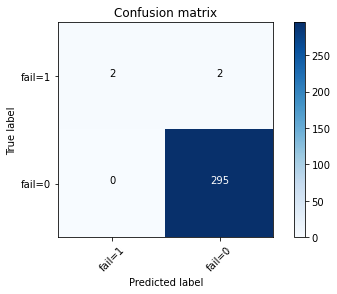

In [101]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fail=1','fail=0'],normalize= False,  title='Confusion matrix')

In [102]:
X = np.nan_to_num(X)

np.isnan(X_train)
np.isnan(y_train)
yhat = LR.predict(X)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
#finding probabilitie using the full ass dataset rather than the one that was split into training. Probably will use more up
#to date data and redo this process
yhat_prob = LR.predict_proba(X)
yhat_prob

array([[0.93, 0.07],
       [0.94, 0.06],
       [0.93, 0.07],
       ...,
       [0.97, 0.03],
       [0.97, 0.03],
       [0.97, 0.03]])

In [56]:
#using this in order to keep track of the row number with the probability matrix
print(np.c_[i,yhat])

[[   1    0]
 [   2    0]
 [   3    0]
 ...
 [1490    0]
 [1491    0]
 [1492    0]]
